In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
data = pd.read_excel("../Paris housing Data Set 2 4050.xlsx")
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,3.0,7,1955.0,0,1340.0
1,538000.0,3.0,NaN,2570.0,7242.0,2.0,3.0,7,1951.0,1991,1690.0
2,180000.0,2.0,1.0,770.0,10000.0,1.0,3.0,6,1933.0,0,2720.0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,5.0,7,1965.0,0,1360.0
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,3.0,8,1987.0,0,1800.0


In [66]:
data_copy = data.copy(deep=True)
data_copy[['bedrooms','bathrooms']].isna().sum()

bedrooms     15
bathrooms    11
dtype: int64

In [67]:
filtered_df = data_copy[data_copy[["bedrooms", "bathrooms"]].isna().all(axis=1)]
filtered_df


,price,bedrooms,bathrooms,sqft_living,sqft_total,floors,condition,grade,built,renovated,living_area_sqft
875,1095000.0,NaN,NaN,3064.0,4764.0,3.5,3.0,7,1990.0,0,2360.0
3119,380000.0,NaN,NaN,1470.0,979.0,3.0,3.0,8,2006.0,0,1470.0
6994,1295650.0,NaN,NaN,4810.0,28008.0,2.0,3.0,12,1990.0,0,4740.0
9773,355000.0,NaN,NaN,2460.0,8049.0,2.0,3.0,8,1990.0,0,2520.0
9854,235000.0,NaN,NaN,1470.0,4800.0,2.0,3.0,7,1996.0,0,1060.0
14423,139950.0,NaN,NaN,844.0,4269.0,1.0,4.0,7,1913.0,0,1380.0
19452,142000.0,NaN,NaN,290.0,20875.0,1.0,1.0,1,1963.0,0,1620.0


In [68]:
len(filtered_df)

7

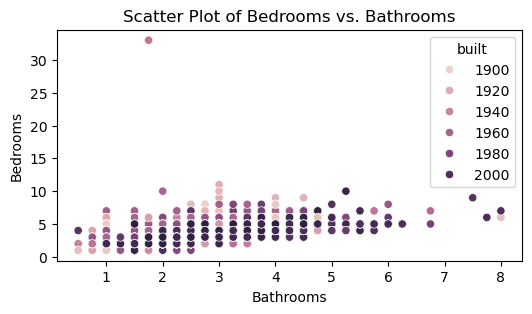

In [69]:
# Scatter plot
plt.figure(figsize=(6, 3))
sns.scatterplot(data = data_copy, x=data_copy["bathrooms"], y=data_copy["bedrooms"], hue="built")

# Labels and title
plt.xlabel("Bathrooms")
plt.ylabel("Bedrooms")
plt.title("Scatter Plot of Bedrooms vs. Bathrooms")
plt.show()

In [70]:
data_copy[['bedrooms','bathrooms']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,19984.0,3.366593,0.930136,1.0,3.0,3.0,4.0,33.0
bathrooms,19988.0,2.072969,0.761162,0.5,1.5,2.0,2.5,8.0


In [71]:
# data_copy['bedrooms'].describe().T
# data_copy['bedrooms'].value_counts()

In [72]:
# percentage of houses with 2 - 5 bedrooms
most_bedroom = data_copy[data_copy['bedrooms'].isin([2,3,4,5])]
len(most_bedroom)


19473

In [73]:
len(most_bedroom)/len(data_copy)

0.9736986849342467

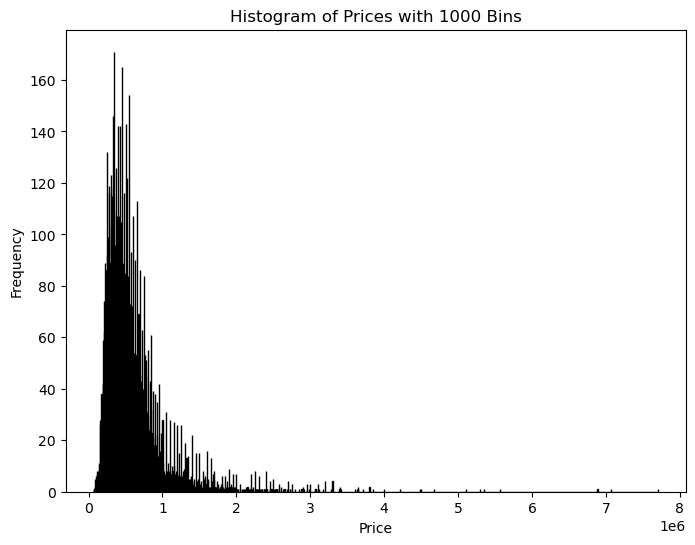

In [76]:
# Create histogram with price bands of 1000
plt.figure(figsize=(8, 6))
plt.hist(data_copy["price"], bins=range(int(data_copy["price"].min()), int(data_copy["price"].max()) + 1000, 1000), edgecolor="black")

# Labels and title
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices with 1000 Bins")
plt.show()
